# Predicting Video Game Sales Statistics

## Overview

Using a dataset from Kaggle, we will use linear regression techniques from Python libraries for machine learning in order to discover correlations between various attributes.

### Import Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Heatmap of Correlations Between Data Attributes

<AxesSubplot:>

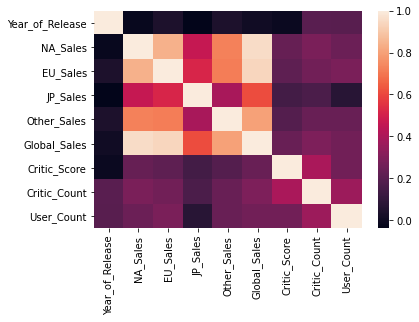

In [101]:
vgsales = pd.read_csv("datasets/video_game_sales.csv")
# Remove rows with NULL values.
vgsales.dropna(inplace=True)
sb.heatmap(vgsales.corr())

Let's explore the connection between a game's success in the Japanese market to predict how well it will do in the North American market.

In [72]:
X = vgsales["JP_Sales"].values
y = vgsales["NA_Sales"].values
X_bar = np.mean(X)
y_bar = np.mean(y)

# Use the Least Squares Method to find equation of regression line.
numer = 0
denom = 0
for i in range(len(X)):
    numer += (X[i] - X_bar) * (y[i]- y_bar)
    denom += (X[i] - X_bar) ** 2
    
b1 = numer / denom
b0 = y_bar - (b1 * X_bar)
print("Slope:", b1)
print("Intercept:", b0)

Slope:  1.5763973208543132
Intercept:  0.29334463606510086


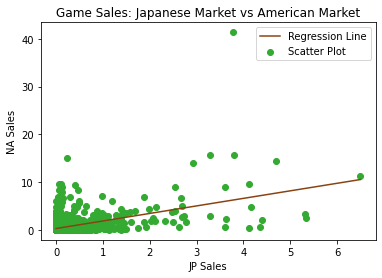

In [95]:
X_plot = np.linspace(np.min(X), np.max(X), len(X))
y_plot = b0 + b1 * X_plot
plt.plot (X_plot, y_plot, c="#894312", label="Regression Line")
plt.scatter(X, y, c="#34aa32", label="Scatter Plot")
plt.title("Game Sales: Japanese Market vs American Market")
plt.xlabel("JP Sales")
plt.ylabel("NA Sales")
plt.legend()
plt.show()

In [98]:
sst = 0
sse = 0
ssr = 0
for i in range(len(X)):
    y_pred = b0 + b1 * X[i]
    sst += (y[i] - y_bar) ** 2
    sse += (y[i] - y_pred) ** 2
    ssr += (y_pred - y_bar) ** 2
print("SST:",sst)
print("SSE:",sse)
print("SSR:",ssr)

SST: 6386.133604395311
SSE: 4983.784328940813
SSR: 1402.3492754544736


In [100]:
print(ssr/sst)

0.21959284949649266
